In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
train_df= pd.read_csv("/content/drive/MyDrive/Data_PS3/Data_tabular/dataset_tabular.csv")
train_df.head()

,Unnamed: 0,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,...,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision,rad_recall_type_right_0,rad_recall_type_right_1,rad_recall_type_right_2,rad_recall_type_left_0,rad_recall_type_left_1,rad_recall_type_left_2
0,21455,1929,01929_20990909_L_CC_4.dcm,2,0,0,0.0,0,0.0,0.0,...,84.025986,25.204033,29.995522,0.0,1,0,0,1,0,0
1,63483,6130,06130_20990909_L_MLO_5.dcm,1,0,0,0.0,0,0.0,0.0,...,167.838710,32.348625,19.273636,0.0,1,0,0,1,0,0
2,55224,5215,05215_20990909_R_MLO_3.dcm,1,0,0,0.0,0,0.0,0.0,...,179.013080,48.934143,27.335514,0.0,1,0,0,1,0,0
3,9273,844,00844_20990909_R_CC_4.dcm,1,0,0,0.0,0,0.0,0.0,...,127.022900,45.641342,35.931587,0.0,1,0,0,1,0,0
4,9536,867,00867_20990909_R_CC_3.dcm,1,0,0,0.0,0,0.0,0.0,...,129.078540,19.353825,14.993835,0.0,1,0,0,1,0,0


In [ ]:
train_df=train_df.sample(frac=1, random_state=42)
train_df.head()

,Unnamed: 0,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,...,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision,rad_recall_type_right_0,rad_recall_type_right_1,rad_recall_type_right_2,rad_recall_type_left_0,rad_recall_type_left_1,rad_recall_type_left_2
6252,65047,6281,06281_20990909_R_MLO_3.dcm,2,0,0,0.0,0,1.0,0.0,...,240.313250,18.634111,7.754093,1.0,1,0,0,1,0,0
4684,38753,3586,03586_20990909_L_CC_2.dcm,1,0,0,0.0,0,0.0,0.0,...,80.975441,12.544000,15.491117,0.0,1,0,0,1,0,0
1731,4446,392,00392_20990909_L_CC_3.dcm,2,0,0,0.0,0,0.0,0.0,...,104.790220,34.700623,33.114372,0.0,1,0,0,1,0,0
4742,85112,8584,08584_20990909_L_MLO_3.dcm,2,0,0,0.0,0,0.0,0.0,...,125.534870,12.384064,9.865040,0.0,1,0,0,1,0,0
4521,91267,9440,09440_20990909_L_CC_2.dcm,2,0,0,0.0,0,0.0,0.0,...,195.604080,27.733215,14.178240,0.0,1,0,0,1,0,0


In [ ]:
train_df=train_df.drop(columns=['Unnamed: 0', "anon_patientid",'anon_filename', "rad_recall_type_right_0", "rad_recall_type_left_0", "rad_r1", "rad_r2"], axis=1)
train_df['rad_decision']=train_df['rad_decision'].astype(int)
train_df.head()

,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_recall,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision,rad_recall_type_right_1,rad_recall_type_right_2,rad_recall_type_left_1,rad_recall_type_left_2
6252,2,0,0,0.0,0,0.0,240.313250,18.634111,7.754093,1,0,0,0,0
4684,1,0,0,0.0,0,0.0,80.975441,12.544000,15.491117,0,0,0,0,0
1731,2,0,0,0.0,0,0.0,104.790220,34.700623,33.114372,0,0,0,0,0
4742,2,0,0,0.0,0,0.0,125.534870,12.384064,9.865040,0,0,0,0,0
4521,2,0,0,0.0,0,0.0,195.604080,27.733215,14.178240,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
mmscaler = MinMaxScaler() 
cols = ['libra_breastarea', 'libra_densearea', 'libra_percentdensity'] 
mmscaler.fit(train_df[cols])
train_df[cols] = mmscaler.transform(train_df[cols]) 


In [ ]:
train_df.columns

Index(['x_age', 'x_case', 'x_type', 'x_lymphnode_met', 'rad_timing',
       'rad_recall', 'libra_breastarea', 'libra_densearea',
       'libra_percentdensity', 'rad_decision', 'rad_recall_type_right_1',
       'rad_recall_type_right_2', 'rad_recall_type_left_1',
       'rad_recall_type_left_2'],
      dtype='object')

In [ ]:
features= ['x_age', 'x_case', 'x_type', 'x_lymphnode_met', 'rad_timing',
       'rad_recall', 'libra_breastarea', 'libra_densearea',
       'libra_percentdensity', 'rad_recall_type_right_1',
       'rad_recall_type_right_2', 'rad_recall_type_left_1',
       'rad_recall_type_left_2']
# X_train=train_df[features]
# Y_train=train_df["rad_decision"]

In [ ]:
X_train=train_df[features]
Y_train=train_df["rad_decision"]

In [ ]:
noisy_rank_label= np.load('/content/drive/MyDrive/Data_PS3/Data_normalized_array/Label_issues_index.npy')

In [ ]:
X_list=np.array(X_train)
Y_list= np.array(Y_train)

In [ ]:
X_clean=[x for i, x in enumerate(X_list) if i not in noisy_rank_label]
Y_clean=[x for i, x in enumerate(Y_list) if i not in noisy_rank_label]

(array([2079.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3221.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

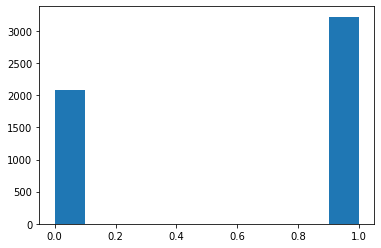

In [ ]:
plt.hist(Y_clean)

In [ ]:
X=pd.DataFrame(X_clean, columns= features)
X.head()

,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_recall,libra_breastarea,libra_densearea,libra_percentdensity,rad_recall_type_right_1,rad_recall_type_right_2,rad_recall_type_left_1,rad_recall_type_left_2
0,2.0,0.0,0.0,0.0,0.0,0.0,0.244112,0.410562,0.479636,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.312855,0.110643,0.125963,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.545050,0.316925,0.191577,0.0,0.0,0.0,0.0
3,2.0,1.0,3.0,0.0,1.0,1.0,0.483677,0.611512,0.402434,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.505453,0.105838,0.075511,0.0,0.0,0.0,0.0


In [ ]:
Y=np.array(Y_clean)

In [ ]:
path='/content/drive/MyDrive/Data_PS3/Data_normalized_array/'
np.save(path + 'clean_tabular_data.npy', np.array(X))
np.save(path + 'clean_tabular_label.npy', Y)

#### Model building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report 

In [ ]:
from sklearn.model_selection import GridSearchCV 
#creat a new KNN model 
KNN = KNeighborsClassifier(weights="") 
grid_param={'n_neighbors': range(1,15), 
 'weights' : ['uniform', 'distance'], 
 'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(KNN, grid_param, cv = 10, scoring = 'accuracy', n_jobs=-1) 
grid.fit(X,Y) 
print(grid.best_score_) 
print(grid.best_params_) 
print(grid.best_estimator_)

0.7311320754716981
{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=12)


In [ ]:
from sklearn.model_selection import cross_val_score
model=KNeighborsClassifier(metric='manhattan', n_neighbors=12)
for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", "roc_auc"]:
        print ((score)," : ",cross_val_score(model, X, Y, scoring=score, cv=10).mean())

accuracy  :  0.7311320754716981
precision_macro  :  0.73021549879416
recall_macro  :  0.7410338151719058
f1_macro  :  0.7274830727849048
roc_auc  :  0.8112097563384328


In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, Y, cv=10)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred)

array([[1525,  554],
       [ 888, 2333]])

#### feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif
MI_score = mutual_info_classif(X, Y, random_state=0) 
for feature in zip(features, MI_score): 
    print(feature)

('x_age', 0.018263081311870044)
('x_case', 0.0656240886694639)
('x_type', 0.07617098714978532)
('x_lymphnode_met', 0.013642300733786694)
('rad_timing', 0.09899507681840469)
('rad_recall', 0.1957089493081412)
('libra_breastarea', 0.014122410162819454)
('libra_densearea', 0.005397305235331551)
('libra_percentdensity', 0.017277610113199504)
('rad_recall_type_right_1', 0.06230691484551154)
('rad_recall_type_right_2', 0.010911700978133876)
('rad_recall_type_left_1', 0.07230157718059993)
('rad_recall_type_left_2', 0.015867018849571535)


In [ ]:
Gain=pd.DataFrame(zip(features, MI_score))
Gain=Gain.sort_values(by = 1, ascending = False)
Gain.shape

(13, 2)

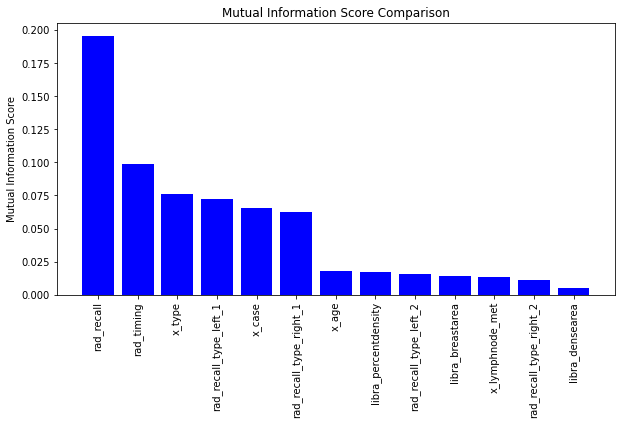

In [ ]:
plt.figure(figsize=(10,5)) 
plt.bar(x=Gain[0].T, height=Gain[1].T, color='blue') 
plt.xticks(rotation='vertical') 
plt.ylabel('Mutual Information Score') 
plt.title('Mutual Information Score Comparison') 
plt.show()

In [ ]:
X1=X.copy()

In [ ]:
KNN = KNeighborsClassifier() 
grid_param={'n_neighbors': range(2,20), 
    'weights' : ['uniform', 'distance'], 
    'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(KNN, grid_param, cv = 10, scoring = 'accuracy') 
    
for i in [0.95]:
    a=int(i*Gain.shape[0])+1
    x=np.array(Gain[0][:a-1])
    X0=X1[x]
    grid.fit(X0,Y)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(x)
    print(grid.best_score_)  
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro"]:
            print (score," : ",cross_val_score(model, X0, Y, scoring=score, cv=10).mean())



Pour le choix de  95.0 % des variables les plus importants, on a:
['rad_recall' 'rad_timing' 'x_type' 'rad_recall_type_left_1' 'x_case'
 'rad_recall_type_right_1' 'x_age' 'libra_percentdensity'
 'rad_recall_type_left_2' 'libra_breastarea' 'x_lymphnode_met'
 'rad_recall_type_right_2']
0.7337735849056604
accuracy  :  0.7337735849056604
precision_macro  :  0.7259679025769028
recall_macro  :  0.7342495834806375
f1_macro  :  0.7269832988561319


In [ ]:
X_train=train_df[features]
Y_train=train_df["rad_decision"]

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

Knn2 = KNeighborsClassifier() 
grid_param={'n_neighbors': range(2,20), 
    'weights' : ['uniform', 'distance'], 
    'metric' : ['euclidean', 'manhattan', 'minkowski']} 
grid = GridSearchCV(Knn2, grid_param, cv = 10, scoring = 'accuracy',  n_jobs=-1) 

knn = KNeighborsClassifier(n_neighbors=3)
for i in [0.2,0.3,0.4,0.5, 0.6]:
    a=int(i*Gain.shape[0])+1
    sfs = SequentialFeatureSelector(knn, n_features_to_select=a,  n_jobs=-1)
    sfs.fit(X_train, Y_train)
    v=sfs.get_support()
    Xu=[]
    b=0
    for e in v:
      if e==True:
        Xu.append(features[b])
      b+=1
    sfs.transform(X_train)
    Xt=X1[Xu]

    grid.fit(Xt,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(grid.best_score_)  
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro"]:
            print (score," : ",cross_val_score(model, Xt, Y_train, scoring=score, cv=10).mean())


Pour le choix de  20.0 % des variables les plus importants, on a:
0.7636
accuracy  :  0.7636
precision_macro  :  0.827387462930291
recall_macro  :  0.7636
f1_macro  :  0.7514545632517726
Pour le choix de  30.0 % des variables les plus importants, on a:
0.7636
accuracy  :  0.7636
precision_macro  :  0.827387462930291
recall_macro  :  0.7636
f1_macro  :  0.7514545632517726
Pour le choix de  40.0 % des variables les plus importants, on a:
0.7654
accuracy  :  0.7654
precision_macro  :  0.8285729299133339
recall_macro  :  0.7654
f1_macro  :  0.7535124203585805
Pour le choix de  50.0 % des variables les plus importants, on a:
0.7654
accuracy  :  0.7654
precision_macro  :  0.8285729299133339
recall_macro  :  0.7654
f1_macro  :  0.7535124203585805
Pour le choix de  60.0 % des variables les plus importants, on a:
0.7654
accuracy  :  0.7654
precision_macro  :  0.8285729299133339
recall_macro  :  0.7654
f1_macro  :  0.7535124203585805


### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
grid_param = {"C":[1,2,3,4, 5],"gamma":[1.0,2.0,3.0]} 
#classifieur à utiliser
svmC = SVC() 
#instanciation de la recherche
grid = GridSearchCV(svmC, grid_param, cv = 10, scoring = 'accuracy', n_jobs=-1) 
grid.fit(X,Y) 
print(grid.best_score_) 
print(grid.best_params_) 
print(grid.best_estimator_)

0.7413207547169811
{'C': 5, 'gamma': 3.0}
SVC(C=5, gamma=3.0)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
model=SVC()
for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", "roc_auc"]:
        print ((score)," : ",cross_val_score(model, X_train, Y_train, scoring=score, cv=10).mean())

accuracy  :  0.7615999999999999
precision_macro  :  0.8166710934120903
recall_macro  :  0.7615999999999999
f1_macro  :  0.7507283692218023
roc_auc  :  0.7811512


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
grid_param = {"C":[1,2,3],"gamma":[1.0,2.0]} 
#classifieur à utiliser
svmC = SVC() 
#instanciation de la recherche
grid = GridSearchCV(svmC, grid_param, cv = 10, scoring = 'accuracy') 
    
for i in [0.2,0.3,0.4,0.5]:
    a=int(i*Gain.shape[0])+1
    x=np.array(Gain[0][:a-1])
    X=X1[x]
    grid.fit(X,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(grid.best_score_)
    print(grid.best_estimator_)  
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro", "roc_auc"]:
            print (score," : ",cross_val_score(model, X, Y_train, scoring=score, cv=10).mean())


Pour le choix de  20.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
roc_auc  :  0.7635558
Pour le choix de  30.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
roc_auc  :  0.7635745999999999
Pour le choix de  40.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
roc_auc  :  0.7602057999999999
Pour le choix de  50.0 % des variables les plus importants, on a:
0.7655000000000001
accuracy  :  0.7655000000000001
precision_macro  :  0.8218382642147779
recall_macro  :  0.7655000000000001
f1_macro  :  0.7547393125900933
roc_auc  :  0.7632796


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

grid_param = {"C":[1,2,3],"gamma":[1.0,2.0]} 
#classifieur à utiliser
svmC = SVC() 
#instanciation de la recherche
grid = GridSearchCV(svmC, grid_param, cv = 10, scoring = 'accuracy') 
for i in [0.2,0.3,0.4,0.5, 0.6]:
    a=int(i*Gain.shape[0])+1
    sfs = SequentialFeatureSelector(svmC, n_features_to_select=a)
    sfs.fit(X_train, Y_train)
    v=sfs.get_support()
    Xu=[]
    b=0
    for e in v:
      if e==True:
        Xu.append(features[b])
      b+=1
    sfs.transform(X_train)
    Xt=X1[Xu]

    grid.fit(Xt,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(grid.best_score_)
    print(grid.best_estimator_)  
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro",'roc_auc']:
            print (score," : ",cross_val_score(model, Xt, Y_train, scoring=score, cv=10).mean())


Pour le choix de  20.0 % des variables les plus importants, on a:
0.7655000000000001
SVC(C=1, gamma=1.0)
accuracy  :  0.7655000000000001
precision_macro  :  0.8218382642147779
recall_macro  :  0.7655000000000001
f1_macro  :  0.7547393125900933
roc_auc  :  0.762776
Pour le choix de  30.0 % des variables les plus importants, on a:
0.7655000000000001
SVC(C=1, gamma=1.0)
accuracy  :  0.7655000000000001
precision_macro  :  0.8218382642147779
recall_macro  :  0.7655000000000001
f1_macro  :  0.7547393125900933
roc_auc  :  0.764342
Pour le choix de  40.0 % des variables les plus importants, on a:
0.766
SVC(C=3, gamma=2.0)
accuracy  :  0.766
precision_macro  :  0.8231825039501471
recall_macro  :  0.7659999999999999
f1_macro  :  0.7551412874212898
roc_auc  :  0.7736072
Pour le choix de  50.0 % des variables les plus importants, on a:
0.766
SVC(C=3, gamma=2.0)
accuracy  :  0.766
precision_macro  :  0.8237037162775822
recall_macro  :  0.7659999999999999
f1_macro  :  0.7550549916626632
roc_auc  :  

#### Decision Tree

In [ ]:
from pandas.core.frame import Dtype
from sklearn.model_selection import GridSearchCV 
#creat a new KNN model 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)

#scoring = {"AUC": "roc_auc", "Accuracy": "accuracy"}
grid_param={
    "criterion": ["gini", "entropy"],
    'max_depth':range(1,10),
    "min_samples_leaf":range(1,10)}

grid = GridSearchCV(DT, grid_param, cv = 10, scoring="accuracy") 

grid.fit(X,Y) 
print(grid.best_score_) 
print(grid.best_params_) 
print(grid.best_estimator_)

0.7466037735849056
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 9}
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9)
for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", "roc_auc"]:
        print ((score)," : ",cross_val_score(model, X, Y, scoring=score, cv=10).mean())

accuracy  :  0.7466037735849056
precision_macro  :  0.7375646026177918
recall_macro  :  0.7441989560595699
f1_macro  :  0.7386997678767419
roc_auc  :  0.825305859193117


In [ ]:
from sklearn.feature_selection import mutual_info_classif
MI_score = mutual_info_classif(X_train, Y_train, random_state=0) 
for feature in zip(features, MI_score): 
    print(feature)

('x_age', 0.0)
('x_case', 0.08047656926312108)
('x_type', 0.07935360166466521)
('x_lymphnode_met', 0.023335923858409435)
('rad_timing', 0.10235679169198675)
('rad_recall', 0.22481386305334894)
('libra_breastarea', 0.011390334486481635)
('libra_densearea', 0.008368893530636523)
('libra_percentdensity', 0.0)
('rad_recall_type_right_1', 0.0879585667959677)
('rad_recall_type_right_2', 0.010501150263841463)
('rad_recall_type_left_1', 0.095083693747825)
('rad_recall_type_left_2', 0.018889085531188732)


In [ ]:
Gain=pd.DataFrame(zip(features, MI_score))
Gain=Gain.sort_values(by = 1, ascending = False)
Gain.shape

(13, 2)

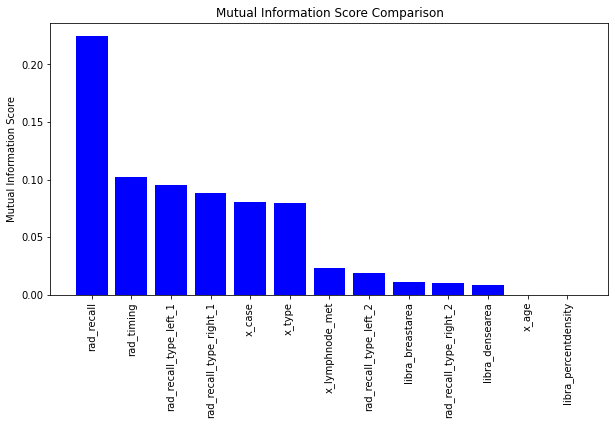

In [ ]:
plt.figure(figsize=(10,5)) 
plt.bar(x=Gain[0].T, height=Gain[1].T, color='blue') 
plt.xticks(rotation='vertical') 
plt.ylabel('Mutual Information Score') 
plt.title('Mutual Information Score Comparison') 
plt.show()

In [ ]:
X1=X_train.copy()

In [ ]:
DT = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, random_state=0)

#scoring = {"AUC": "roc_auc", "Accuracy": "accuracy"}
grid_param={
    "criterion": ["gini", "entropy"],
    'max_depth':range(1,10),
    "min_samples_leaf":range(1,10)}
grid = GridSearchCV(DT, grid_param, cv = 10, scoring="accuracy") 
  
for i in [0.2,0.3,0.4,0.5,0.6,0.7]:
    a=int(i*Gain.shape[0])+1
    x=np.array(Gain[0][:a-1])
    print(x)
    X=X1[x]
    grid.fit(X,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(grid.best_score_)  
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro"]:
            print (score," : ",cross_val_score(model, X, Y_train, scoring=score, cv=10).mean())



['rad_recall' 'rad_timing']
Pour le choix de  20.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
['rad_recall' 'rad_timing' 'rad_recall_type_left_1']
Pour le choix de  30.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
['rad_recall' 'rad_timing' 'rad_recall_type_left_1'
 'rad_recall_type_right_1' 'x_case']
Pour le choix de  40.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
['rad_recall' 'rad_timing' 'rad_recall_type_left_1'
 'rad_recall_type_right_1' 'x_case' 'x_type']
Pour le choix de  50.0 % des variables les plus importants, on a:
0.7656
accuracy  :  0.7656
precision_macro  :  0.8220227371421378
rec

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

DT = DecisionTreeClassifier()
grid_param={
    "criterion": ["gini", "entropy"],
    'max_depth':range(1,10),
    "min_samples_leaf":range(1,10)}
grid = GridSearchCV(DT, grid_param, cv = 10, scoring = 'accuracy') 


for i in [0.2,0.3,0.4,0.5, 0.6, 0.7]:
    a=int(i*Gain.shape[0])+1
    sfs = SequentialFeatureSelector(DT, n_features_to_select=a)
    sfs.fit(X_train, Y_train)
    v=sfs.get_support()
    Xu=[]
    b=0
    for e in v:
      if e==True:
        Xu.append(features[b])
      b+=1
    sfs.transform(X_train)
    Xt=X1[Xu]


    grid.fit(Xt,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(grid.best_score_) 
    print(Xu) 
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro","roc_auc"]:
            print (score," : ",cross_val_score(model, Xt, Y_train, scoring=score, cv=10).mean())


Pour le choix de  20.0 % des variables les plus importants, on a:
0.7656
['x_type', 'rad_timing', 'rad_recall']
accuracy  :  0.7656
precision_macro  :  0.8220227371421378
recall_macro  :  0.7656
f1_macro  :  0.7548333944554763
roc_auc  :  0.7740372
Pour le choix de  30.0 % des variables les plus importants, on a:
0.7656
['x_case', 'x_type', 'rad_timing', 'rad_recall']
accuracy  :  0.7656
precision_macro  :  0.8220227371421378
recall_macro  :  0.7656
f1_macro  :  0.7548333944554763
roc_auc  :  0.7740372
Pour le choix de  40.0 % des variables les plus importants, on a:
0.7656
['x_case', 'x_type', 'rad_timing', 'rad_recall', 'rad_recall_type_right_1', 'rad_recall_type_right_2']
accuracy  :  0.7656
precision_macro  :  0.8220227371421378
recall_macro  :  0.7656
f1_macro  :  0.7548333944554763
roc_auc  :  0.7740372
Pour le choix de  50.0 % des variables les plus importants, on a:
0.7656
['x_case', 'x_type', 'rad_timing', 'rad_recall', 'rad_recall_type_right_1', 'rad_recall_type_right_2', 'ra

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV 
Rf = RandomForestClassifier(max_depth=2, random_state=0)

grid_param={
            'max_depth': [3,6,10,None],
            'criterion': ["gini", "entropy"],
            'n_estimators': [100, 200, 500]
            }


grid = GridSearchCV(Rf, grid_param, cv = 10, scoring="accuracy",  n_jobs=-1) 

grid.fit(X_train,Y_train) 
print(grid.best_score_) 
print(grid.best_params_) 
print(grid.best_estimator_)

0.7641
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=0)


In [ ]:
print(grid.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=0)


In [ ]:
from sklearn.model_selection import cross_val_score
model= RandomForestClassifier()
for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", 'roc_auc']:
        print ((score)," : ",cross_val_score(model, X, Y, scoring=score, cv=10).mean())

accuracy  :  0.7224528301886791
precision_macro  :  0.7061631530981479
recall_macro  :  0.71347375217176
f1_macro  :  0.7091211265161284
roc_auc  :  0.8097755044046604


In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", 'roc_auc']:
        print ((score)," : ",cross_val_score(model, X, Y, scoring=score, cv=10).mean())

accuracy  :  0.7350943396226415
precision_macro  :  0.7403290851264408
recall_macro  :  0.7533919394196686
f1_macro  :  0.7352081370545448
roc_auc  :  0.8269720920111283


In [ ]:
model.fit(X,Y)
a=model.predict_proba(X)
a.shape

(5300, 2)

In [ ]:
Rf = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=0)

grid_param={
            'max_depth': [3,6,8,10,12,None],
            'criterion': ["gini", "entropy"],
            'n_estimators': [100, 200, 500]
            }
grid = GridSearchCV(Rf, grid_param, cv = 10, scoring="accuracy") 
  
for i in [0.2,0.3,0.4,0.5,0.6]:
    a=int(i*Gain.shape[0])+1
    x=np.array(Gain[0][:a-1])
    print(x)
    X=X1[x]
    grid.fit(X,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(grid.best_score_)  
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro"]:
            print (score," : ",cross_val_score(model, X, Y_train, scoring=score, cv=10).mean())

['rad_recall' 'rad_timing']
Pour le choix de  20.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
['rad_recall' 'rad_timing' 'rad_recall_type_left_1']
Pour le choix de  30.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
['rad_recall' 'rad_timing' 'rad_recall_type_left_1'
 'rad_recall_type_right_1' 'x_case']
Pour le choix de  40.0 % des variables les plus importants, on a:
0.7614
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
['rad_recall' 'rad_timing' 'rad_recall_type_left_1'
 'rad_recall_type_right_1' 'x_case' 'x_type']
Pour le choix de  50.0 % des variables les plus importants, on a:
0.7655000000000001
accuracy  :  0.7655000000000001
precision_macro  :

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

Rf = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=0)
grid_param={
            'max_depth': [3,6,8,10,12,None],
            'criterion': ["gini", "entropy"],
            'n_estimators': [100, 200, 500]
            }
grid = GridSearchCV(Rf, grid_param, cv = 10, scoring="accuracy") 

for i in [0.2,0.3,0.4,0.5, 0.6, 0.7]:
    a=int(i*Gain.shape[0])+1
    sfs = SequentialFeatureSelector(Rf, n_features_to_select=a)
    sfs.fit(X_train, Y_train)
    v=sfs.get_support()
    Xu=[]
    b=0
    for e in v:
      if e==True:
        Xu.append(features[b])
      b+=1
    sfs.transform(X_train)
    Xt=X1[Xu]

    #grid.fit(Xt,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    #print(grid.best_score_) 
    print(Xu) 
    #model=grid.best_estimator_
    model=Rf
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro", 'roc_auc']:
            print (score," : ",cross_val_score(model, Xt, Y_train, scoring=score, cv=10).mean())


Pour le choix de  20.0 % des variables les plus importants, on a:
['x_type', 'rad_timing', 'rad_recall']
accuracy  :  0.7655000000000001
precision_macro  :  0.8218382642147779
recall_macro  :  0.7655000000000001
f1_macro  :  0.7547393125900933
roc_auc  :  0.7739204
Pour le choix de  30.0 % des variables les plus importants, on a:
['x_case', 'x_type', 'rad_timing', 'rad_recall']
accuracy  :  0.7655000000000001
precision_macro  :  0.8218382642147779
recall_macro  :  0.7655000000000001
f1_macro  :  0.7547393125900933
roc_auc  :  0.7739364
Pour le choix de  40.0 % des variables les plus importants, on a:
['x_case', 'x_type', 'rad_timing', 'rad_recall', 'rad_recall_type_right_1', 'rad_recall_type_left_1']
accuracy  :  0.7655000000000001
precision_macro  :  0.8218382642147779
recall_macro  :  0.7655000000000001
f1_macro  :  0.7547393125900933
roc_auc  :  0.7739364
Pour le choix de  50.0 % des variables les plus importants, on a:
['x_case', 'x_type', 'rad_timing', 'rad_recall', 'rad_recall_ty

#### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
DT =DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,random_state=0)
clf = BaggingClassifier(DT, n_estimators=10, random_state=0)

grid_param={
            'n_estimators': [10,20,40,80,100]
            }

grid = GridSearchCV(clf, grid_param, cv = 10, scoring="accuracy",  n_jobs=-1) 

grid.fit(X_train,Y_train) 
print(grid.best_score_) 
print(grid.best_params_) 
print(grid.best_estimator_)                 

0.7635
{'n_estimators': 80}
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=6,
                                                        random_state=0),
                  n_estimators=80, random_state=0)


In [ ]:
from sklearn.model_selection import cross_val_score
model= grid.best_estimator_
for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", 'roc_auc']:
        print ((score)," : ",cross_val_score(model, X_train, Y_train, scoring=score, cv=10).mean())

accuracy  :  0.7635
precision_macro  :  0.8193858624752541
recall_macro  :  0.7635
f1_macro  :  0.7526599659173205
roc_auc  :  0.8084488000000001


In [ ]:
BG= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=6,
                                                        random_state=0),
                  n_estimators=80, random_state=0)
grid_param={
            'n_estimators': [10,20,40,80,100]
            }
grid = GridSearchCV(BG, grid_param, cv = 10, scoring="accuracy") 
  
for i in [0.2,0.3,0.4,0.5,0.6]:
    a=int(i*Gain.shape[0])+1
    x=np.array(Gain[0][:a-1])
    print(x)
    X=X1[x]
    grid.fit(X,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(x)
    print(grid.best_score_)
    print(grid.best_estimator_)  
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro"]:
            print (score," : ",cross_val_score(model, X, Y_train, scoring=score, cv=10).mean())

['rad_recall' 'rad_timing']
Pour le choix de  20.0 % des variables les plus importants, on a:
['rad_recall' 'rad_timing']
0.7614
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=6,
                                                        random_state=0),
                  n_estimators=40, random_state=0)
accuracy  :  0.7614
precision_macro  :  0.806522689310559
recall_macro  :  0.7613999999999999
f1_macro  :  0.7522491229908369
['rad_recall' 'rad_timing' 'rad_recall_type_left_1']
Pour le choix de  30.0 % des variables les plus importants, on a:
['rad_recall' 'rad_timing' 'rad_recall_type_left_1']
0.7614
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=6

In [ ]:
BG= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=6,
                                                        random_state=0),
                  n_estimators=80, random_state=0)
grid_param={
            'n_estimators': [10,20,40,80,100]
            }
grid = GridSearchCV(BG, grid_param, cv = 10, scoring="accuracy") 

for i in [0.2,0.3,0.4,0.5, 0.6, 0.7]:
    a=int(i*Gain.shape[0])+1
    sfs = SequentialFeatureSelector(Rf, n_features_to_select=a)
    sfs.fit(X_train, Y_train)
    v=sfs.get_support()
    Xu=[]
    b=0
    for e in v:
      if e==True:
        Xu.append(features[b])
      b+=1
    sfs.transform(X_train)
    Xt=X1[Xu]
    grid.fit(Xt,Y_train)
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(Xu) 
    print(grid.best_estimator_)
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro", 'roc_auc']:
            print (score," : ",cross_val_score(model, Xt, Y_train, scoring=score, cv=10).mean())

Pour le choix de  20.0 % des variables les plus importants, on a:
['x_type', 'rad_timing', 'rad_recall']
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=6,
                                                        random_state=0),
                  random_state=0)
accuracy  :  0.7656
precision_macro  :  0.8220227371421378
recall_macro  :  0.7656
f1_macro  :  0.7548333944554763
roc_auc  :  0.7738273999999999
Pour le choix de  30.0 % des variables les plus importants, on a:
['x_case', 'x_type', 'rad_timing', 'rad_recall']
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=6,
                                                        random_state=0),
          

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
LGBM = LGBMClassifier()

for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", 'roc_auc']:
        print ((score)," : ",cross_val_score(LGBM, X, Y, scoring=score, cv=10).mean())


accuracy  :  0.7220754716981131
precision_macro  :  0.7119314792041832
recall_macro  :  0.7181519431982145
f1_macro  :  0.7133095670810455
roc_auc  :  0.8146606235714376


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
for score in ["accuracy", "precision_macro", "recall_macro","f1_macro", 'roc_auc']:
        print ((score)," : ",cross_val_score(clf, X, Y, scoring=score, cv=10).mean())

accuracy  :  0.7292452830188678
precision_macro  :  0.7588102683193003
recall_macro  :  0.7613997722394714
f1_macro  :  0.7290450151063332
roc_auc  :  0.8243782507575583


In [ ]:
clf = LinearDiscriminantAnalysis()
for i in [0.2,0.3,0.4,0.5, 0.6, 0.7]:
    a=int(i*Gain.shape[0])+1
    sfs = SequentialFeatureSelector(clf, n_features_to_select=a)
    sfs.fit(X_train, Y_train)
    v=sfs.get_support()
    Xu=[]
    b=0
    for e in v:
      if e==True:
        Xu.append(features[b])
      b+=1
    sfs.transform(X_train)
    Xt=X1[Xu]
    print("Pour le choix de ", i*100,"% des variables les plus importants, on a:")
    print(Xu) 
    model=grid.best_estimator_
    for score in ["accuracy", "precision_macro", "recall_macro", "f1_macro", 'roc_auc']:
            print (score," : ",cross_val_score(model, Xt, Y_train, scoring=score, cv=10).mean())

Pour le choix de  20.0 % des variables les plus importants, on a:
['x_age', 'rad_timing', 'rad_recall']
accuracy  :  0.7635
precision_macro  :  0.8216102732441015
recall_macro  :  0.7635
f1_macro  :  0.75227091766302
roc_auc  :  0.7996804
Pour le choix de  30.0 % des variables les plus importants, on a:
['x_age', 'rad_timing', 'rad_recall', 'libra_densearea']
accuracy  :  0.7605000000000001
precision_macro  :  0.8156937593279387
recall_macro  :  0.7605000000000001
f1_macro  :  0.7495136632057526
roc_auc  :  0.8021537999999999
Pour le choix de  40.0 % des variables les plus importants, on a:
['x_age', 'rad_timing', 'rad_recall', 'libra_densearea', 'rad_recall_type_right_1', 'rad_recall_type_right_2']
accuracy  :  0.7605000000000001
precision_macro  :  0.8156937593279387
recall_macro  :  0.7605000000000001
f1_macro  :  0.7495136632057526
roc_auc  :  0.8021537999999999
Pour le choix de  50.0 % des variables les plus importants, on a:
['x_age', 'rad_timing', 'rad_recall', 'libra_densearea'

### Auto-Sklearn

In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 33.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 4.8 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=9da6f98129f764d72e39a48b9317ec00fdc14eb998186c454fae99d527cd6673

In [ ]:
import autosklearn

In [ ]:
import pandas as pd
import sklearn.metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from autosklearn.classification import AutoSklearnClassifier

from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)

In [ ]:
# features= ['x_age', 'x_case', 'x_type', 'x_lymphnode_met',
#        'rad_recall', 'libra_breastarea', 'libra_densearea',
#        'libra_percentdensity', 'rad_decision', 'rad_recall_type_right_1',
#        'rad_recall_type_right_2', 'rad_recall_type_left_1',
#        'rad_recall_type_left_2']
num_cols=['libra_breastarea', 'libra_densearea','libra_percentdensity']
cat_cols=['x_age', 'x_case', 'x_type', 'x_lymphnode_met',
       'rad_recall','rad_recall_type_right_1',
       'rad_recall_type_right_2', 'rad_recall_type_left_1',
       'rad_recall_type_left_2']

X_train[num_cols] = X_train[num_cols].apply(pd.to_numeric)
X_train[cat_cols] = X_train[cat_cols].apply(pd.Categorical)

#X_train=train_df[features]
#Y_train=train_df["rad_timing"]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1977 to 9412
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   x_age                    10000 non-null  category
 1   x_case                   10000 non-null  category
 2   x_type                   10000 non-null  category
 3   x_lymphnode_met          10000 non-null  category
 4   rad_timing               10000 non-null  int64   
 5   rad_recall               10000 non-null  category
 6   libra_breastarea         10000 non-null  float64 
 7   libra_densearea          10000 non-null  float64 
 8   libra_percentdensity     10000 non-null  float64 
 9   rad_recall_type_right_1  10000 non-null  category
 10  rad_recall_type_right_2  10000 non-null  category
 11  rad_recall_type_left_1   10000 non-null  category
 12  rad_recall_type_left_2   10000 non-null  category
dtypes: category(9), float64(3), int64(1)
memory usage: 479.7 KB

In [ ]:
skf = StratifiedKFold(n_splits=5)
  
clf = AutoSklearnClassifier(time_left_for_this_task=1800,
                            max_models_on_disc=5,
                            memory_limit = 10240,
                            resampling_strategy=skf,
                            ensemble_size = 10,
                            metric = average_precision,
                            scoring_functions=[roc_auc, average_precision, accuracy, f1, precision, recall, log_loss], n_jobs=-1)

<ipython-input-59-9ea29c564edd>:3: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 10}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  clf = AutoSklearnClassifier(time_left_for_this_task=1800,


In [ ]:
clf.fit(X = X_train, y = Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 10}, ensemble_size=10,
                      max_models_on_disc=5, memory_limit=10240,
                      metric=average_precision, n_jobs=-1,
                      per_run_time_limit=360,
                      resampling_strategy=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                      scoring_functions=[roc_auc, average_precision, accuracy,
                                         f1, precision, recall, log_loss],
                      time_left_for_this_task=1800)

In [ ]:
df_cv_results = pd.DataFrame(clf.cv_results_).sort_values(by = 'mean_test_score', ascending = False)
df_cv_results

,mean_test_score,rank_test_scores,metric_roc_auc,metric_average_precision,metric_accuracy,metric_f1,metric_precision,metric_recall,metric_log_loss,mean_fit_time,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
10,0.857977,1,0.807163,0.857977,0.7641,0.700247,0.959949,0.5512,0.457998,60.831348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,0.857908,2,0.807249,0.857908,0.7625,0.699542,0.951817,0.5530,0.501907,16.854539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.857631,3,0.806662,0.857631,0.7631,0.699597,0.955992,0.5520,0.461356,280.081348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.857603,4,0.806827,0.857603,0.7629,0.699535,0.954601,0.5522,0.459124,101.719517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0.856514,5,0.806658,0.856514,0.6998,0.673205,0.867229,0.6194,0.589821,33.339221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,0.856404,6,0.804499,0.856404,0.7643,0.700130,0.961959,0.5504,0.473691,130.545503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.856179,7,0.803820,0.856179,0.7619,0.701482,0.939944,0.5596,0.464252,44.879767,...,NaN,NaN,706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.854657,8,0.801118,0.854657,0.7555,0.703502,0.893623,0.5802,0.464995,118.871755,...,0.750000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,0.853896,9,0.799186,0.853896,0.7537,0.707167,0.871963,0.5948,0.469131,78.495603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0.851924,10,0.796176,0.851924,0.7557,0.706825,0.883733,0.5890,0.469100,313.247025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
clf.leaderboard(detailed = True, ensemble_only=False)

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
12,1,0.0,mlp,0.142023,60.831348,11,0.141113,0,1.673213e+09,1.673213e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Initial design
25,2,0.7,liblinear_svc,0.142092,16.854539,24,0.140879,0,1.673214e+09,1.673214e+09,0.0,StatusType.SUCCESS,[],[polynomial],weighting,Initial design
11,3,0.0,mlp,0.142369,280.081348,10,0.139295,0,1.673213e+09,1.673213e+09,0.0,StatusType.SUCCESS,[],[fast_ica],weighting,Initial design
4,4,0.1,mlp,0.142397,101.719517,3,0.141195,0,1.673213e+09,1.673213e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Initial design
13,5,0.0,mlp,0.143486,33.339221,12,0.142749,0,1.673213e+09,1.673213e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Initial design
19,6,0.1,libsvm_svc,0.143596,130.545503,18,0.140284,0,1.673214e+09,1.673214e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Initial design
5,7,0.1,extra_trees,0.143821,44.879767,4,0.095966,0,1.673213e+09,1.673213e+09,0.0,StatusType.SUCCESS,[],[fast_ica],none,Initial design
10,8,0.0,random_forest,0.145343,118.871755,9,0.076725,0,1.673213e+09,1.673213e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Initial design
27,9,0.0,random_forest,0.146104,78.495603,26,0.031545,0,1.673214e+09,1.673214e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],none,Initial design
